# Initial Exploration - Evan & Gabriel

## Important Findings:
#### Training set contains 0.58% true fraud cases
#### Testing set contains 0.39% true fraud cases

#### No missing values in either the train or test set


## Variable Engineering Ideas:
#### Distance between home address and merchant address
#### Day of the week
#### Time of the day
#### Age
#### "Normal activity level" for a specific customer
#### Difference in time from last transaction to first transaction
#### Count of purchases from specific category
#### Average purchase amount
#### Average purchase amount per category
#### Categorical: purchase amount > average purchase amount
#### Categorical: purchase amount > average purchase amount + 1sd
#### Categorical: purchase amount > average purchase amount + 2sd
#### Categorical: purchase amount > average purchase amount per category
#### Categorical: purchase amount > average purchase amount per category + 1sd
#### Categorical: purchase amount > average purchase amount per category + 2sd

#### Categorical: Distance > average distance
#### Categorical: Distance > average distance + 1sd
#### Categorical: Distance > average distance + 2sd



In [1]:
import pandas as pd
import numpy as np
import geopy.distance 
from dateutil.relativedelta import relativedelta
from datetime import datetime
import os
import matplotlib.pyplot as plt


## Reading the csv files and creating two data-frames
pd.set_option('display.max_rows', None, 'display.max_columns', None)

fraud_train = pd.read_csv('fraudTrain.csv')
fraud_test = pd.read_csv('fraudTest.csv')

In [2]:
print('Shape of training set:', fraud_train.shape)
print('Shape of testing set:', fraud_test.shape)

Shape of training set: (1296675, 23)
Shape of testing set: (555719, 23)


In [3]:
print('Shape of training set (dropped NA):', fraud_train.dropna().shape)
print('Shape of testing set (dropped NA):', fraud_test.dropna().shape)

Shape of training set (dropped NA): (1296675, 23)
Shape of testing set (dropped NA): (555719, 23)


In [4]:
fraud_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
fraud_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
train_proportion = fraud_train[fraud_train['is_fraud'] == 1].shape[0] / fraud_train.shape[0] *100
test_proportion = fraud_test[fraud_test['is_fraud'] == 1].shape[0] / fraud_test.shape[0] *100

print('Proportion of fraud in train:', round(train_proportion, 3), '%')
print('Proportion of fraud in test:', round(test_proportion, 3), '%')

Proportion of fraud in train: 0.579 %
Proportion of fraud in test: 0.386 %


# Variable Engineering:

### Distance

In [7]:
n = fraud_test.shape[0]

## Creating empty list to store the reuslts
distance_to_append = []

## Looping through each row to computing the distance between home location and merchant location
for i in range(0,n):
    
    ## lat and long of the customer's home address
    coords_1 = (fraud_test['lat'][i], fraud_test['long'][i])
    
    ## lat and long from the the merchant address
    coords_2 = (fraud_test['merch_lat'][i], fraud_test['merch_long'][i])
    
    ## Here we compute the disance in miles between the locations
    distance_to_append.append(geopy.distance.geodesic(coords_1, coords_2).miles)

## Adding results to our data set
fraud_test['Distance'] = distance_to_append

### Age

In [8]:
## Creating empty list to store the resutls
ages_to_append = []

## Looping through each observation and computing the age of each individual from DOB
for i in range(0,n):
    
    ## The last date of this year
    year_of_2021 = datetime.strptime('2021-12-31', "%Y-%m-%d")
    
    ## Defining DOB as a datetime variable
    dob = datetime.strptime(fraud_test.dob[i], "%Y-%m-%d")
    
    ## Here we compute the ages
    ages_to_append.append(relativedelta(year_of_2021, dob).years)

## Adding results to our data set
fraud_test['Age'] = ages_to_append

### Day of the week

In [9]:
dates = pd.to_datetime(fraud_test['trans_date_trans_time'])
fraud_test['DayOfWeek'] = dates.dt.day_name()

### Month of the year

In [10]:
months = pd.to_datetime(fraud_test['trans_date_trans_time'])
fraud_test['Month'] = dates.dt.month

### Hour of the day

In [11]:
hour_of_the_day = []

for i in range(0,n):
    hour_of_the_day.append(datetime.strptime(fraud_test.trans_date_trans_time[i] ,"%Y-%m-%d %H:%M:%S").hour)
    
fraud_test['HourOfTheDay'] = hour_of_the_day

### Card Activity Measures:

#### Total card uses
#### Card uses by month
#### Card uses by day of the week
#### Card uses by hour of the day
#### Time difference between last and first transaction
#### Card uses by category

In [12]:
card_nums = list(fraud_test['cc_num'].unique())

In [13]:
## Defining empty data set and initializing variables as zero
test_data = pd.DataFrame(columns = fraud_test.columns)
test_data['Total_Card_Uses'] = 0
test_data['Uses_This_Month'] = 0
test_data['Uses_This_Day'] = 0
test_data['Uses_This_Hour'] = 0
test_data['Total_Time_Difference'] = 0
test_data['Card_Uses_Per_Category'] = 0


## Looping through all unique credit card numbers in the data set
for i in card_nums:
    
    ## Defining the data for the specified card number
    data = fraud_test[fraud_test['cc_num'] == i]
    
    ###############
    ## CARD USES ##
    ###############
    
    ## Total card uses for a specific card number is the number of times that it appears in the data set
    data['Total_Card_Uses'] = int(data.shape[0])
    
    ########################
    ## CARD USES BY MONTH ##
    ########################
    
    ## Card uses this month is generated with a monthly frequency table
    monthly = pd.DataFrame(data['Month'].value_counts())
    monthly['temp'] = monthly.index
    monthly = monthly.reset_index(drop = True)
    monthly.columns = ['Uses_This_Month', 'Month']

    data = monthly.merge(data, on = 'Month', how = 'left')
    
    
    ###########################
    ## CARD USES BY WEEK DAY ##
    ###########################
    
    ## Card uses this day is generated with a daily frequency table
    daily = pd.DataFrame(data['DayOfWeek'].value_counts())
    daily['temp'] = daily.index
    daily = daily.reset_index(drop = True)
    daily.columns = ['Uses_This_Day', 'DayOfWeek']

    data = daily.merge(data, on = 'DayOfWeek', how = 'left')
    
    
    #######################
    ## CARD USES BY HOUR ##
    #######################
    
    ## Card uses this hour is generated with a hourly frequency table
    hourly = pd.DataFrame(data['HourOfTheDay'].value_counts())
    hourly['temp'] = hourly.index
    hourly = hourly.reset_index(drop = True)
    hourly.columns = ['Uses_This_Hour', 'HourOfTheDay']

    data = hourly.merge(data, on = 'HourOfTheDay', how = 'left')
    
    
    ############################################
    ## TIME DIFFERENCE BETWEEN FIRST AND LAST ##
    ############################################
    
    ## Sorting the dataframe by unix time and then taking the difference between the last and first transactions
    data = data.sort_values('unix_time')
    data['Total_Time_Difference'] = data['unix_time'][data.shape[0] - 1] - data['unix_time'][0]
    
    
    ############################
    ## CARD USES PER CATEGORY ##
    ############################
    
    ## Card uses per category is generated with a category frequency table
    category = pd.DataFrame(data['category'].value_counts())
    category['temp'] = category.index
    category = category.reset_index(drop = True)
    category.columns = ['Card_Uses_Per_Category', 'category']

    data = category.merge(data, on = 'category', how = 'left')
    
    
    
    ## Adding the data for the specific cc_num to the overall test_data
    test_data = pd.concat([test_data, data]).reset_index()
    test_data = test_data.drop(columns = ['index'], axis = 1)
    

<ipython-input-13-a76d246c3142>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Total_Card_Uses'] = int(data.shape[0])


## Visualizing the transformed data

In [14]:
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Distance,Age,DayOfWeek,Month,HourOfTheDay,Total_Card_Uses,Uses_This_Month,Uses_This_Day,Uses_This_Hour,Total_Time_Difference,Card_Uses_Per_Category
0,606,2020-06-21 15:39:04,2291163933867244,fraud_Goyette-Gerhold,kids_pets,17.15,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2ba65201d0c9119227e27b6640ff4415,1371829144,34.235448,-81.649282,0,44.945786,53,Sunday,6,15,640,34,105,25,1390435,75.0
1,9063,2020-06-23 19:09:08,2291163933867244,fraud_Gottlieb Group,kids_pets,33.04,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,153908231d18432fbe84d38843566465,1372014548,33.822538,-81.167030,0,16.574719,53,Tuesday,6,19,640,34,121,26,1390435,75.0
2,20006,2020-06-28 12:24:42,2291163933867244,fraud_Pacocha-Weissnat,kids_pets,97.11,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,a7ce9765e2787d71b3cbf1180bbf9c75,1372422282,34.210744,-81.619366,0,42.693587,53,Sunday,6,12,640,34,105,26,1390435,75.0
3,24346,2020-06-29 15:10:42,2291163933867244,"fraud_Lowe, Dietrich and Erdman",kids_pets,83.05,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,536882da390f8abbec70f093e6d32ebc,1372518642,34.792149,-80.031387,0,76.896639,53,Monday,6,15,640,34,125,25,1390435,75.0
4,35904,2020-07-03 21:20:50,2291163933867244,fraud_Lubowitz-Walter,kids_pets,38.23,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,703fcefd02a218582cbfb8a6a183be54,1372886450,34.650874,-81.599348,0,60.587103,53,Friday,7,21,640,101,79,23,1390435,75.0


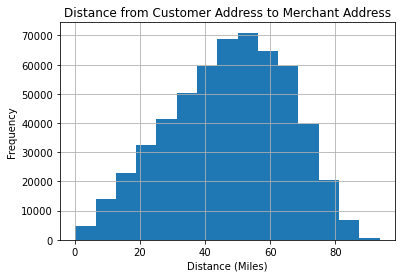

In [15]:
plt.hist(test_data['Distance'], bins = 15)
plt.title('Distance from Customer Address to Merchant Address')
plt.xlabel('Distance (Miles)')
plt.ylabel('Frequency')
plt.grid()
plt.show()